In [3]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy.io import loadmat
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
!pip install sklearn_som
from sklearn_som.som import SOM
from sklearn.preprocessing import StandardScaler


In [4]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [5]:
# Set the path to directory
path_to_folder = "ENME691/final_project/Project 3/Dataset for Team"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENME691/final_project/Project 3/Dataset for Team


Data preprocessing - Loading data from .mat and writing them into a .csv file


Load data from .csv file and store them in numpy array

In [6]:
# Training data
file_path = '/content/drive/MyDrive/ENME691/final_project/Project 3/Dataset for Team/train_data.csv'
data_train_csv = pd.read_csv(file_path)
data_train_final = data_train_csv.to_numpy()
print("Shape of training data ",data_train_final.shape)

# Testing data
file_path = '/content/drive/MyDrive/ENME691/final_project/Project 3/Dataset for Team/data_test_final.csv'
data_test_csv = pd.read_csv(file_path, header=None)
data_test_final = data_test_csv.to_numpy()
print("Shape of testing data ", data_test_final.shape)

# Training data labels
file_path = '/content/drive/MyDrive/ENME691/final_project/Project 3/Dataset for Team/train_data_labels.csv'
data_trainlbs_csv = pd.read_csv(file_path)
data_trainlbs_final = data_trainlbs_csv.to_numpy()
print("Shape of training data labels ",data_trainlbs_final.shape)

Shape of training data  (8192, 2048)
Shape of testing data  (8192, 512)
Shape of training data labels  (1, 2048)


Time Domain plots

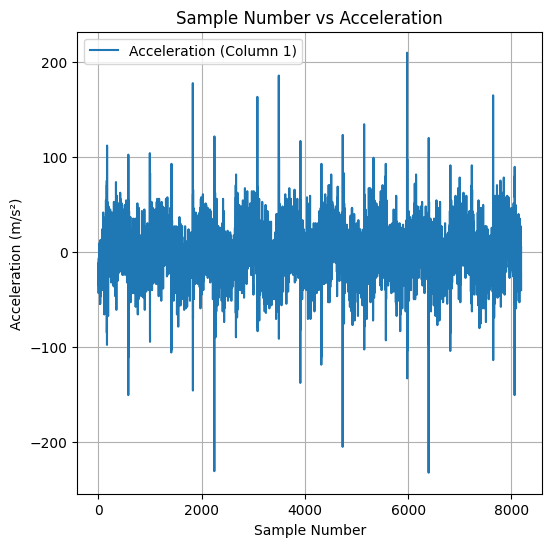

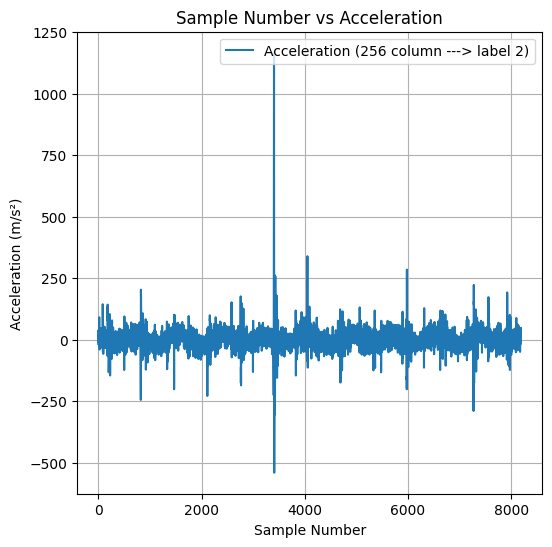

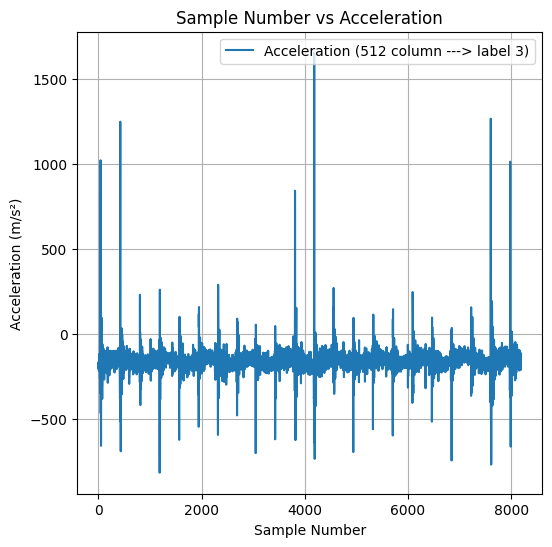

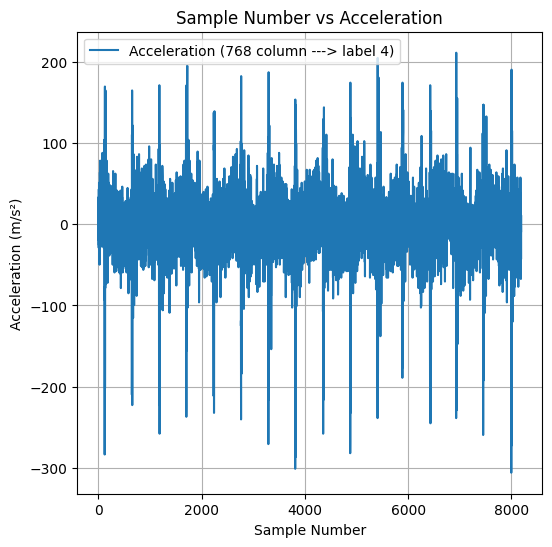

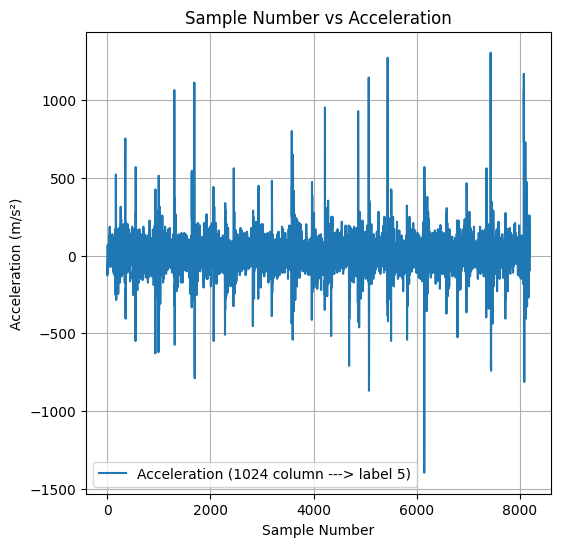

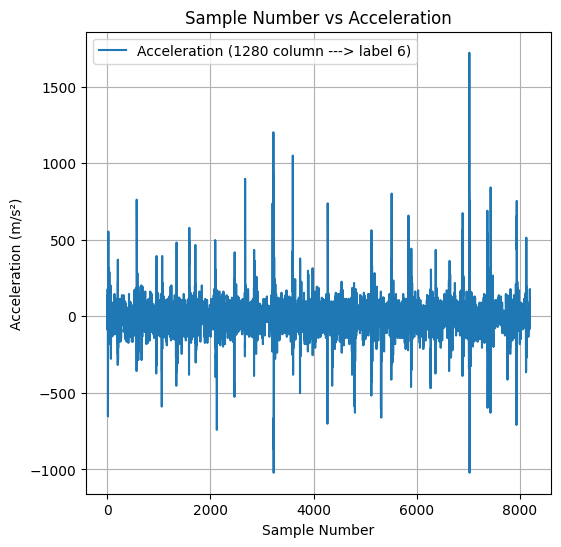

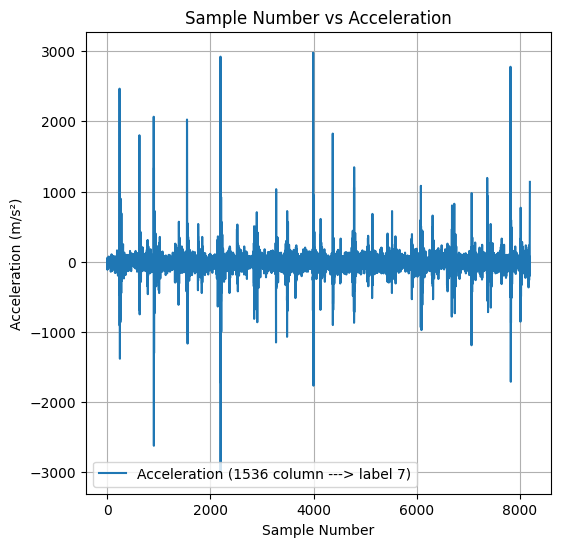

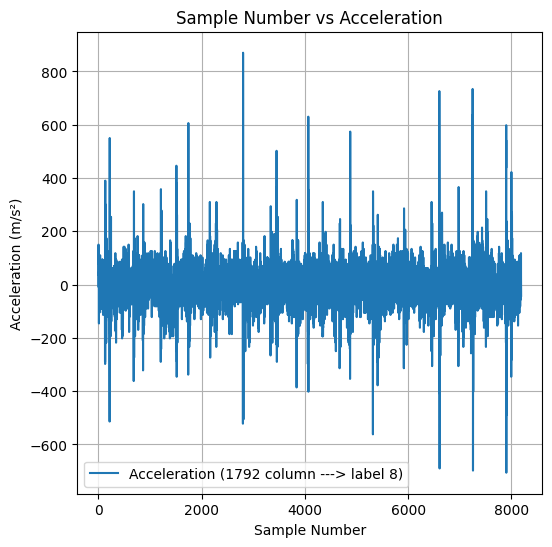

In [7]:
# plotting for label 1
# Use sample indices as the time axis
time = np.arange(data_train_final.shape[0])

# Select a single test column to plot (e.g., the first column---> label 1)
acceleration = data_train_final[:, 0]  # First column, adjust if needed
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(time, acceleration, label='Acceleration (Column 1)')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (m/s²)')
plt.title('Sample Number vs Acceleration')
plt.legend()
plt.grid(True)

# Plotting for label 2
# Select a single test column to plot (e.g., 256 column ---> label 2)
acceleration = data_train_final[:, 256]  # First column, adjust if needed
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(time, acceleration, label='Acceleration (256 column ---> label 2)')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (m/s²)')
plt.title('Sample Number vs Acceleration')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for label 3
# Select a single test column to plot (e.g., 512 column ---> lebel 3)
acceleration = data_train_final[:, 512]  # First column, adjust if needed
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(time, acceleration, label='Acceleration (512 column ---> label 3)')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (m/s²)')
plt.title('Sample Number vs Acceleration')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for label 4
# Select a single test column to plot (e.g., 768 column ---> lebel 4)
acceleration = data_train_final[:, 768]  # First column, adjust if needed
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(time, acceleration, label='Acceleration (768 column ---> label 4)')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (m/s²)')
plt.title('Sample Number vs Acceleration')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for label 5
# Select a single test column to plot (e.g., 1024 column ---> label 5)
acceleration = data_train_final[:, 1024]  # First column, adjust if needed
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(time, acceleration, label='Acceleration (1024 column ---> label 5)')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (m/s²)')
plt.title('Sample Number vs Acceleration')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for label 6
# Select a single test column to plot (e.g., 1280 column ---> label 6)
acceleration = data_train_final[:, 1280]  # First column, adjust if needed
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(time, acceleration, label='Acceleration (1280 column ---> label 6)')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (m/s²)')
plt.title('Sample Number vs Acceleration')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for label 7
# Select a single test column to plot (e.g., 1536 column ---> lebel 7)
acceleration = data_train_final[:, 1563]  # First column, adjust if needed
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(time, acceleration, label='Acceleration (1536 column ---> label 7)')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (m/s²)')
plt.title('Sample Number vs Acceleration')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for label 8
# Select a single test column to plot (e.g., 1792 column ---> lebel 8)
acceleration = data_train_final[:, 1792]  # First column, adjust if needed
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(time, acceleration, label='Acceleration (1792 column ---> label 8)')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (m/s²)')
plt.title('Sample Number vs Acceleration')
plt.legend()
plt.grid(True)
plt.show()


Fourier transformation and plots

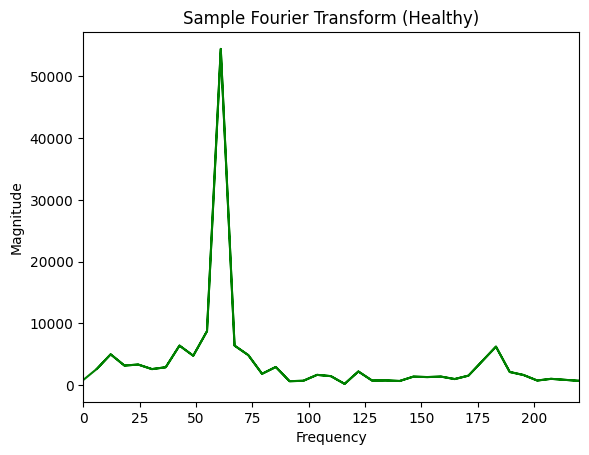

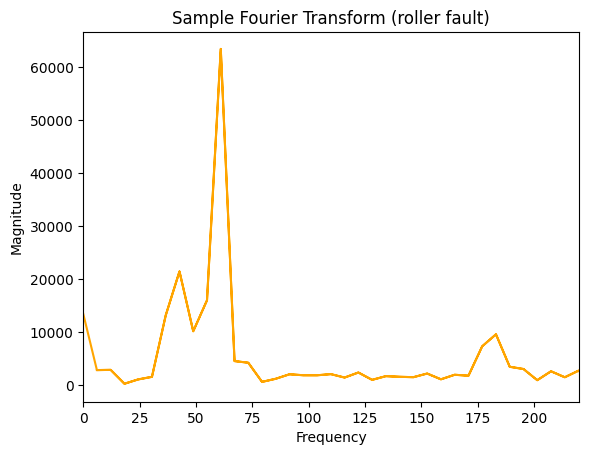

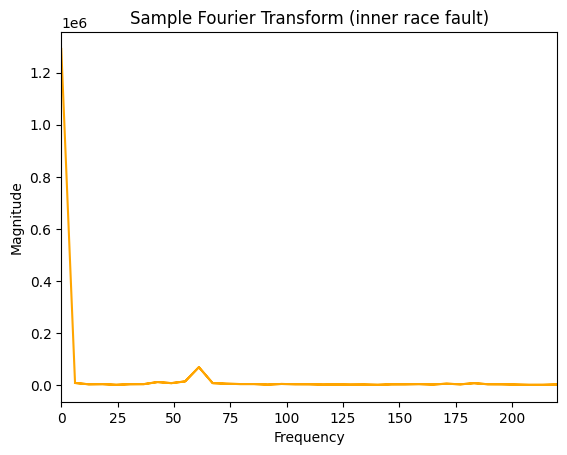

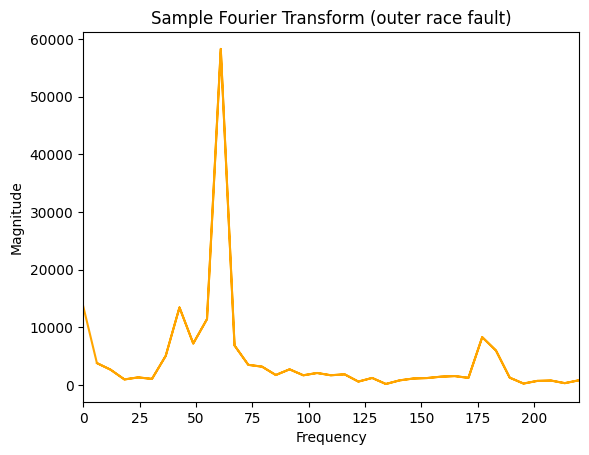

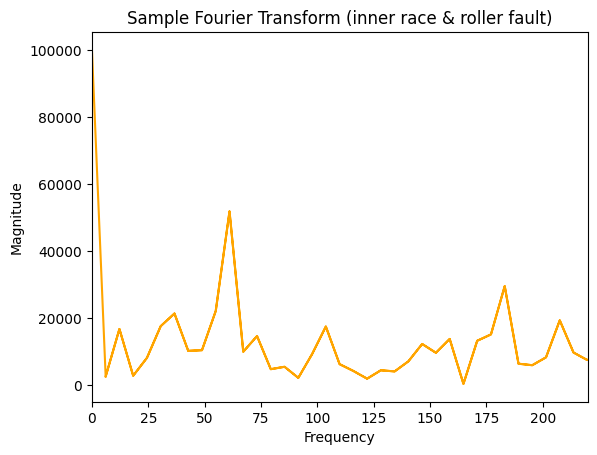

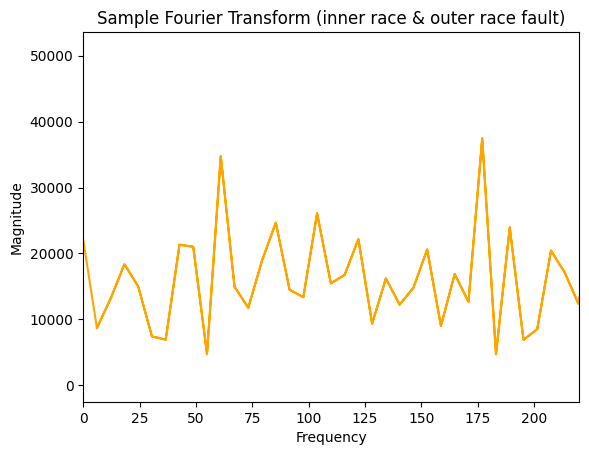

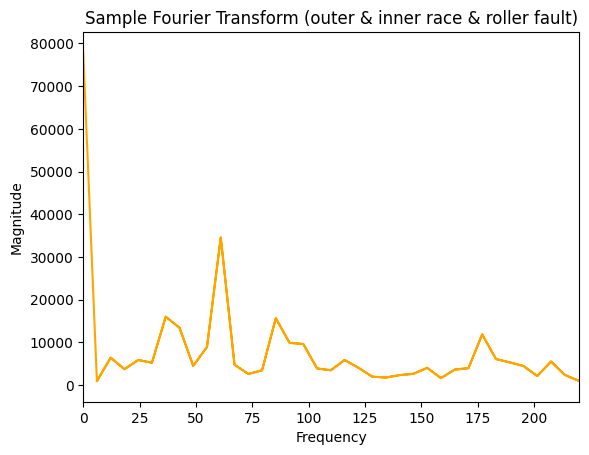

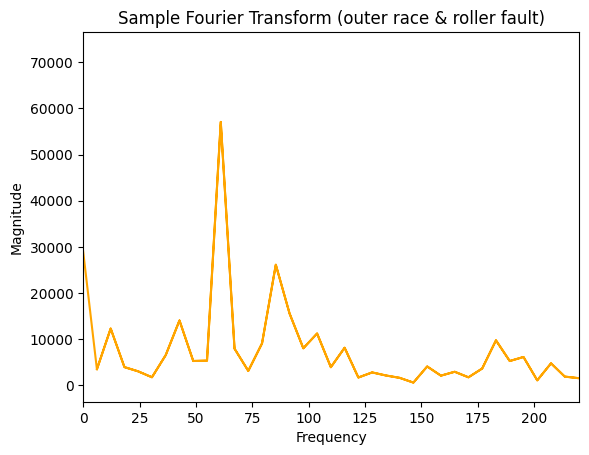

In [ ]:
sampling_frequency = 50000
data_train_frequency = scp.fft.fft(data_train_final, axis=0)
data_test_frequency = scp.fft.fft(data_test_final, axis=0)
frequency_axis = scp.fft.fftfreq(len(data_train_final), 1/sampling_frequency)
plt.figure(figsize=(6, 6))
plt.plot(np.abs(frequency_axis), np.abs(data_train_frequency[:,0]), color='green')
plt.title('Sample Fourier Transform (Healthy)')
plt.xlim([0,220])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
plt.figure(figsize=(6, 6))
plt.plot(np.abs(frequency_axis), np.abs(data_train_frequency[:,256]), color='orange')
plt.title('Sample Fourier Transform (roller fault)')
plt.xlim([0,220])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
plt.figure(figsize=(6, 6))
plt.plot(np.abs(frequency_axis), np.abs(data_train_frequency[:,512]), color='orange')
plt.title('Sample Fourier Transform (inner race fault)')
plt.xlim([0,220])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
plt.figure(figsize=(6, 6))
plt.plot(np.abs(frequency_axis), np.abs(data_train_frequency[:,768]), color='orange')
plt.title('Sample Fourier Transform (outer race fault)')
plt.xlim([0,220])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
plt.figure(figsize=(6, 6))
plt.plot(np.abs(frequency_axis), np.abs(data_train_frequency[:,1024]), color='orange')
plt.title('Sample Fourier Transform (inner race & roller fault)')
plt.xlim([0,220])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
plt.figure(figsize=(6, 6))
plt.plot(np.abs(frequency_axis), np.abs(data_train_frequency[:,1280]), color='orange')
plt.title('Sample Fourier Transform (inner race & outer race fault)')
plt.xlim([0,220])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
plt.figure(figsize=(6, 6))
plt.plot(np.abs(frequency_axis), np.abs(data_train_frequency[:,1536]), color='orange')
plt.title('Sample Fourier Transform (outer & inner race & roller fault)')
plt.xlim([0,220])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
plt.figure(figsize=(6, 6))
plt.plot(np.abs(frequency_axis), np.abs(data_train_frequency[:,1792]), color='orange')
plt.title('Sample Fourier Transform (outer race & roller fault)')
plt.xlim([0,220])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()


Feature selection and extraction

(33, 2048)
(33, 512)


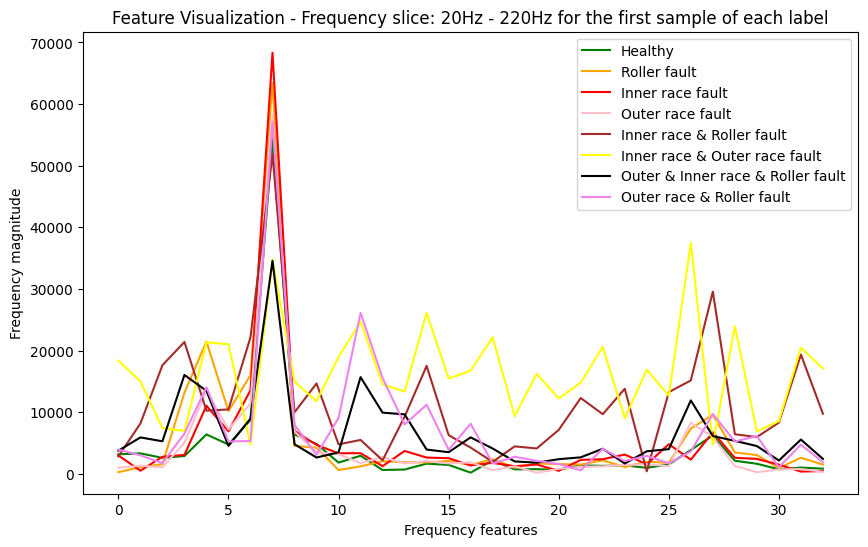

In [ ]:
# Frequency

min_freq = np.argmin(np.abs(frequency_axis - 20))
max_freq = np.argmin(np.abs(frequency_axis - 220))

data_train_freq = np.abs(data_train_frequency[min_freq:max_freq,:])
data_test_freq = np.abs(data_test_frequency[min_freq:max_freq,:])
print(data_train_freq.shape)
print(data_test_freq.shape)

plt.figure(figsize=(10, 6))
labels = ['Healthy', 'Roller fault', 'Inner race fault', 'Outer race fault', 'Inner race & Roller fault', 'Inner race & Outer race fault', 'Outer & Inner race & Roller fault', 'Outer race & Roller fault']
colors = ['green', 'orange', 'red', 'pink', 'brown', 'yellow', 'black', 'violet']
for i in range(0,8,1):
  plt.plot(np.arange(33), data_train_freq[:,i*256], label=labels[i], color=colors[i])
plt.title("Feature Visualization - Frequency slice: 20Hz - 220Hz for the first sample of each label")
plt.xlabel("Frequency features")
plt.ylabel("Frequency magnitude")
plt.legend()
plt.show()


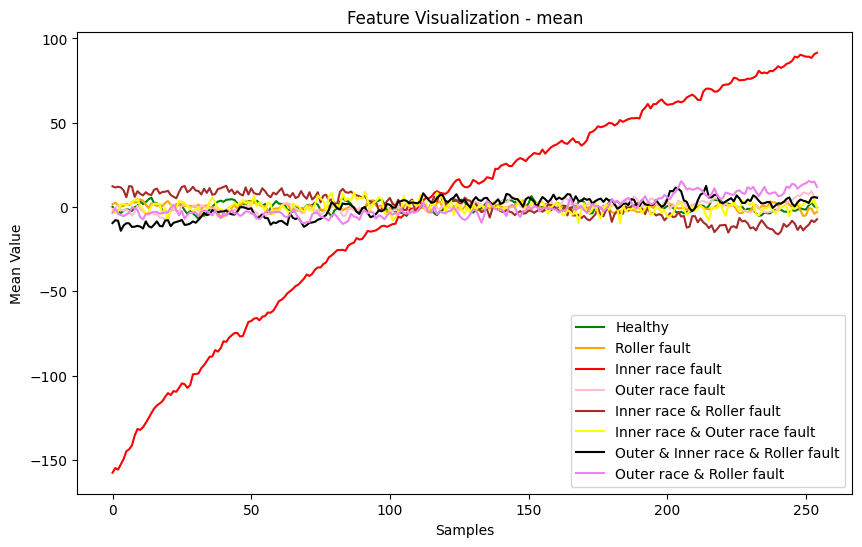

In [ ]:
# Mean

# Calculate the mean for the training set
data_train_mean = np.mean(data_train_final, axis=0).reshape(1, -1)
mean_plot = data_train_mean.flatten()

# Calculate the skewness for the testing set
data_test_mean = np.mean(data_test_final, axis=0).reshape(1, -1)

plt.figure(figsize=(10, 6))
labels = ['Healthy', 'Roller fault', 'Inner race fault', 'Outer race fault', 'Inner race & Roller fault', 'Inner race & Outer race fault', 'Outer & Inner race & Roller fault', 'Outer race & Roller fault']
colors = ['green', 'orange', 'red', 'pink', 'brown', 'yellow', 'black', 'violet']
for i in range(0,8,1):
  plt.plot(np.arange(255), mean_plot[i*256:256*(i+1)-1], label=labels[i], color=colors[i])
plt.title("Feature Visualization - mean")
plt.xlabel("Samples")
plt.ylabel("Mean Value")
plt.legend()
plt.show()

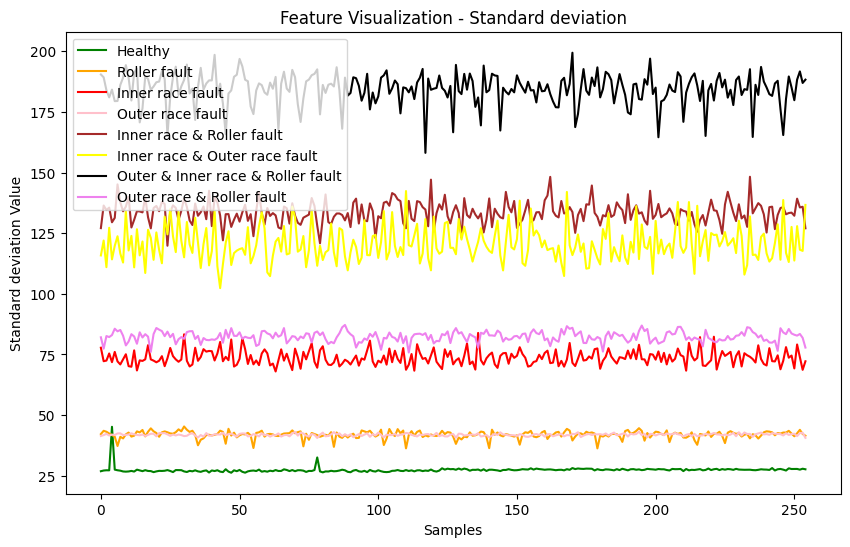

In [ ]:
# Standard deviation

# Calculate the skewness for the training set
data_train_std = np.std(data_train_final, axis=0).reshape(1, -1)
std_plot = data_train_std.flatten()

# Calculate the skewness for the testing set
data_test_std = np.std(data_test_final, axis=0).reshape(1, -1)

plt.figure(figsize=(10, 6))
labels = ['Healthy', 'Roller fault', 'Inner race fault', 'Outer race fault', 'Inner race & Roller fault', 'Inner race & Outer race fault', 'Outer & Inner race & Roller fault', 'Outer race & Roller fault']
colors = ['green', 'orange', 'red', 'pink', 'brown', 'yellow', 'black', 'violet']
for i in range(0,8,1):
  plt.plot(np.arange(255), std_plot[i*256:256*(i+1)-1], label=labels[i], color=colors[i])
plt.title("Feature Visualization - Standard deviation")
plt.xlabel("Samples")
plt.ylabel("Standard deviation Value")
plt.legend()
plt.show()

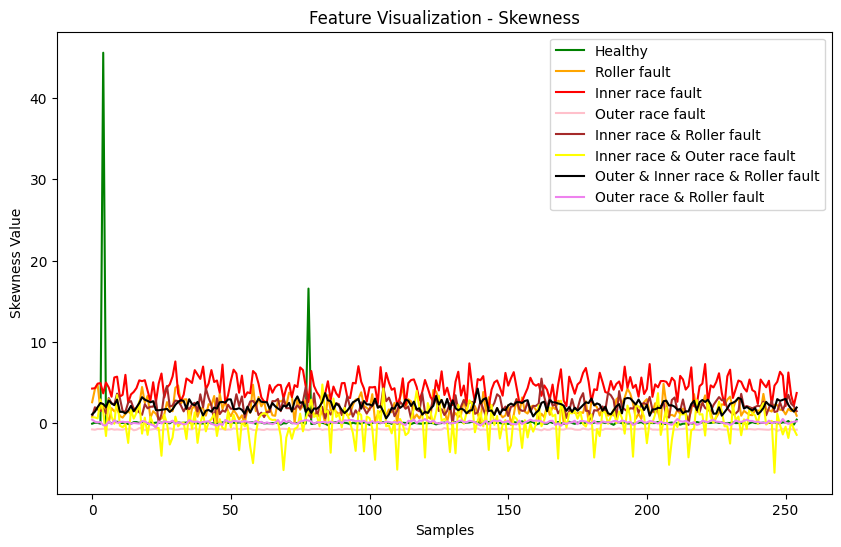

In [ ]:
# Skewness

# Calculate the skewness for the training set
data_train_skew = skew(data_train_final, axis=0).reshape(1, -1)
skew_plot = data_train_skew.flatten()

# Calculate the skewness for the testing set
data_test_skew = skew(data_test_final, axis=0).reshape(1, -1)

plt.figure(figsize=(10, 6))
labels = ['Healthy', 'Roller fault', 'Inner race fault', 'Outer race fault', 'Inner race & Roller fault', 'Inner race & Outer race fault', 'Outer & Inner race & Roller fault', 'Outer race & Roller fault']
colors = ['green', 'orange', 'red', 'pink', 'brown', 'yellow', 'black', 'violet']
for i in range(0,8,1):
  plt.plot(np.arange(255), skew_plot[i*256:256*(i+1)-1], label=labels[i], color=colors[i])
plt.title("Feature Visualization - Skewness")
plt.xlabel("Samples")
plt.ylabel("Skewness Value")
plt.legend()
plt.show()

(1, 2048)


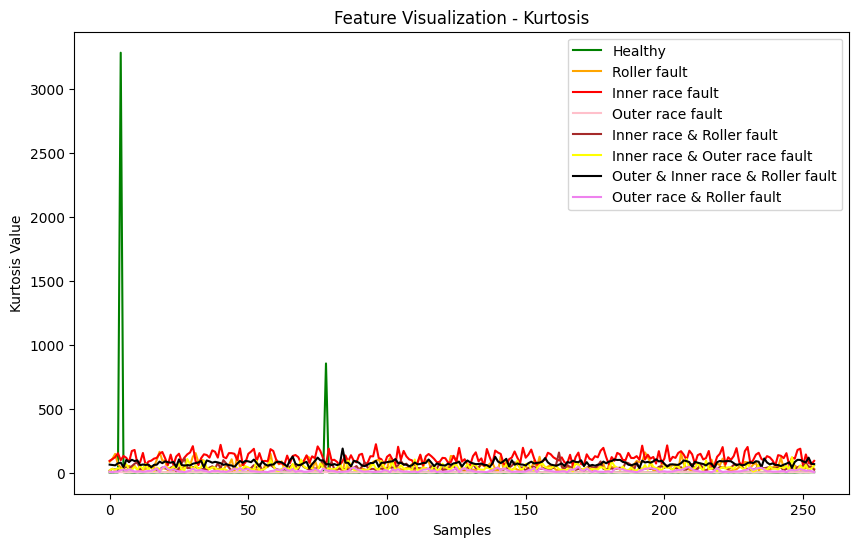

In [ ]:
# Kurtosis

# Calculate the kurtosis for the training set
data_train_kurtosis = kurtosis(data_train_final, axis=0).reshape(1, -1)
kurtosis_plot = data_train_kurtosis.flatten()
print(data_train_kurtosis.shape)
# Calculate the kurtosis for the testing set
data_test_kurtosis = kurtosis(data_test_final, axis=0).reshape(1, -1)

plt.figure(figsize=(10,6))
labels = ['Healthy', 'Roller fault', 'Inner race fault', 'Outer race fault', 'Inner race & Roller fault', 'Inner race & Outer race fault', 'Outer & Inner race & Roller fault', 'Outer race & Roller fault']
colors = ['green', 'orange', 'red', 'pink', 'brown', 'yellow', 'black', 'violet']
for i in range(0,8,1):
  plt.plot(np.arange(255), kurtosis_plot[i*256:256*(i+1)-1], label=labels[i], color=colors[i])
plt.title("Feature Visualization - Kurtosis")
plt.xlabel("Samples")
plt.ylabel("Kurtosis Value")
plt.legend()
plt.show()

In [ ]:
# Feature stack

training_features = np.concatenate((data_train_std.T, data_train_skew.T, data_train_freq.T), axis=1)
testing_features = np.concatenate((data_test_std.T, data_test_skew.T, data_test_freq.T), axis=1)
print(training_features.shape)
print(testing_features.shape)

(2048, 35)
(512, 35)


In [ ]:
# PCA using xplained variance to understand how many components to keep

# Apply PCA for training features
pca = PCA()
pca.fit(training_features)
data_train_pca = pca.transform(training_features)

# Apply PCA for test features
pca_test = PCA()
pca_test.fit(testing_features)
data_test_pca = pca_test.transform(testing_features)

# Explained variance to understand how many components to keep
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Explained variance to understand how many components to keep
explained_variance_test = pca_test.explained_variance_ratio_
cumulative_variance_test = np.cumsum(explained_variance_test)

# Print out explained variance for each component
print("Explained variance per component for training features:", explained_variance)
print("Cumulative explained variance for training features:", cumulative_variance)

# Print out explained variance for each component
print("Explained variance per component for test features:", explained_variance_test)
print("Cumulative explained variance for test features:", cumulative_variance_test)

# Select number of components based on cumulative variance (e.g., 95% of total variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Number of components to retain 95% variance
pca_train = PCA(n_components=n_components)
data_train_reduced = pca_train.fit_transform(training_features)

# Select number of components based on cumulative variance (e.g., 95% of total variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Number of components to retain 95% variance
pca_test = PCA(n_components=n_components)
data_test_reduced = pca_train.transform(testing_features)

# Output the reduced data
print(f"Reduced data shape: {data_train_reduced.shape}")
print(data_train_reduced)

# Output the reduced data
print(f"Reduced data shape: {data_test_reduced.shape}")
print(data_test_reduced)

Explained variance per component for training features: [5.45518488e-01 7.65126468e-02 5.20084997e-02 3.25917525e-02
 2.12146231e-02 1.96096215e-02 1.78977789e-02 1.57319310e-02
 1.37411146e-02 1.28585131e-02 1.22274411e-02 1.14630140e-02
 1.09545571e-02 1.05788663e-02 1.02511442e-02 9.91964319e-03
 9.65802388e-03 9.31509583e-03 9.00783522e-03 8.72128044e-03
 8.44289531e-03 8.15050382e-03 7.93120864e-03 7.53333485e-03
 7.41551365e-03 7.26370783e-03 7.05000511e-03 6.96740994e-03
 6.58371947e-03 6.29219795e-03 5.73098971e-03 5.69278983e-03
 5.16311477e-03 7.36117684e-07 2.19774647e-09]
Cumulative explained variance for training features: [0.54551849 0.62203114 0.67403963 0.70663139 0.72784601 0.74745563
 0.76535341 0.78108534 0.79482646 0.80768497 0.81991241 0.83137542
 0.84232998 0.85290885 0.86315999 0.87307964 0.88273766 0.89205276
 0.90106059 0.90978187 0.91822477 0.92637527 0.93430648 0.94183981
 0.94925533 0.95651903 0.96356904 0.97053645 0.97712017 0.98341237
 0.98914336 0.9948361

Model =  8


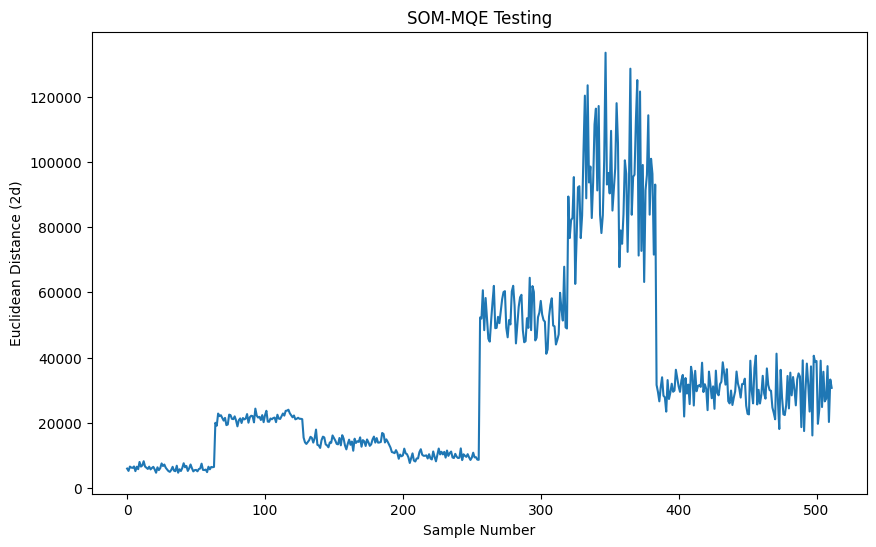

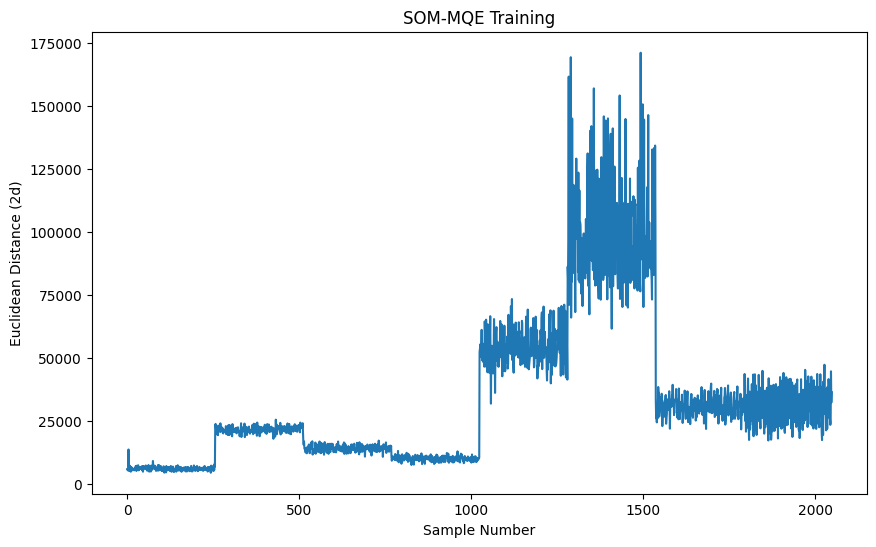

In [ ]:
# SOM-MQE model

somMQEModel = SOM(m=10, n=10, dim=26)
somMQEModel.fit(data_train_reduced[0:255,:], epochs=1000)
transformedValues = somMQEModel.transform(data_train_reduced)
transformedTesting = somMQEModel.transform(data_test_reduced)
distances = [np.mean(transformedValues[i,:]) for i in range(np.shape(transformedValues)[0])]
distancesTest =  [np.mean(transformedTesting[i,:]) for i in range(np.shape(transformedTesting)[0])]
print('Model = ',i+1)
plt.figure(figsize=(10, 6))
plt.plot(distancesTest)
plt.title('SOM-MQE Testing')
plt.xlabel('Sample Number')
plt.ylabel('Euclidean Distance (2d)')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('SOM-MQE Training')
plt.xlabel('Sample Number')
plt.ylabel('Euclidean Distance (2d)')
plt.show()

One-vs-Rest Accuracy: 99.85%

One-vs-Rest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       256
           2       1.00      1.00      1.00       256
           3       0.99      1.00      1.00       256
           4       1.00      1.00      1.00       256
           5       1.00      1.00      1.00       256
           6       1.00      1.00      1.00       256
           7       1.00      1.00      1.00       256
           8       1.00      0.99      0.99       256

    accuracy                           1.00      2048
   macro avg       1.00      1.00      1.00      2048
weighted avg       1.00      1.00      1.00      2048



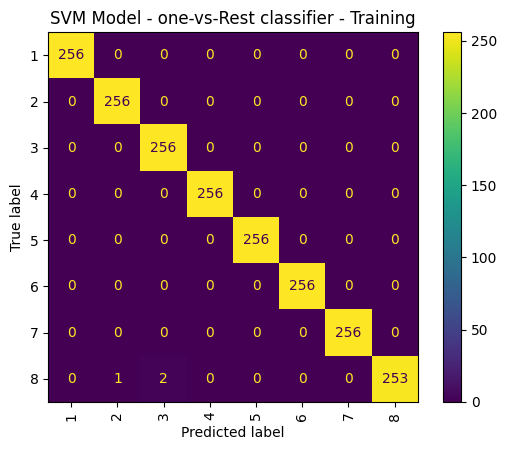

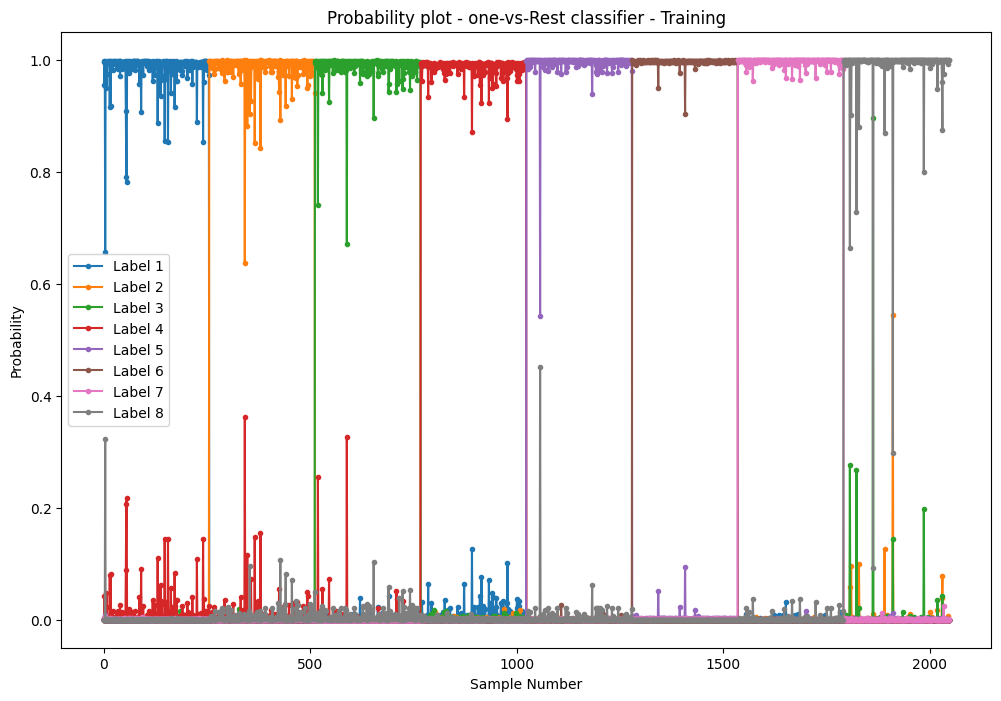

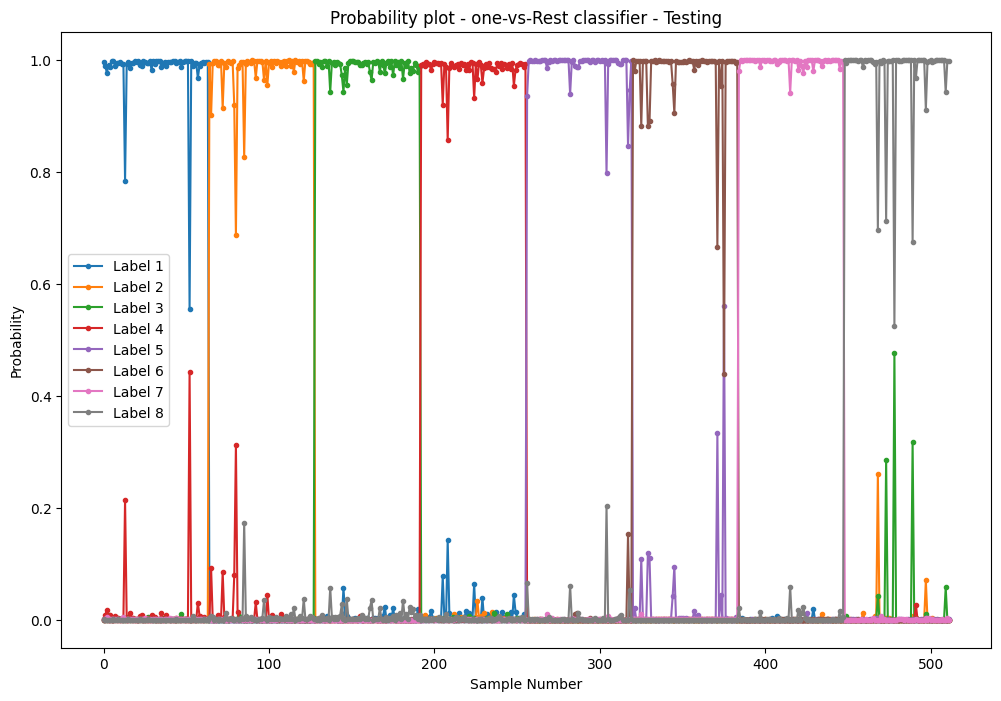

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

data_trainlbs_final = data_trainlbs_final.reshape(-1)
data_testlbs_final = np.concatenate((np.ones(shape=(1,64)),2*np.ones(shape=(1,64)),3*np.ones(shape=(1,64)),4*np.ones(shape=(1,64)),5*np.ones(shape=(1,64)),6*np.ones(shape=(1,64)),7*np.ones(shape=(1,64)),8*np.ones(shape=(1,64))), axis=1).reshape(-1)

# Create the base SVM model
base_svm = svm.SVC(probability=True, kernel='rbf', C=1.0, gamma='scale')

# Create the One-vs-Rest classifier
ovr_svm = OneVsRestClassifier(base_svm)
ovr_svm.fit(data_train_reduced, data_trainlbs_final)
ovr_predictions = ovr_svm.predict(data_train_reduced)

# Evaluate the model
ovr_accuracy = accuracy_score(data_trainlbs_final, ovr_predictions)
print(f"One-vs-Rest Accuracy: {ovr_accuracy * 100:.2f}%")

# Print classification report
print("\nOne-vs-Rest Classification Report:")
print(classification_report(data_trainlbs_final, ovr_predictions))

# Compute confusion matrix
conf_matrix = confusion_matrix(data_trainlbs_final, ovr_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(data_trainlbs_final))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("SVM Model - one-vs-Rest classifier - Training")
plt.show()

# Plot the probability
train_probability = ovr_svm.predict_proba(data_train_reduced)
test_probability = ovr_svm.predict_proba(data_test_reduced)

plt.figure(figsize=(12, 8))
plt.plot(train_probability, marker='.')
plt.title('Probability plot - one-vs-Rest classifier - Training')
plt.legend(['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8'])
plt.xlabel('Sample Number')
plt.ylabel('Probability')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(test_probability, marker='.')
plt.title('Probability plot - one-vs-Rest classifier - Testing')
plt.legend(['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8'])
plt.xlabel('Sample Number')
plt.ylabel('Probability')
plt.show()

One-vs-One Accuracy: 99.95%

One-vs-One Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       256
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       256
           4       1.00      1.00      1.00       256
           5       1.00      1.00      1.00       256
           6       1.00      1.00      1.00       256
           7       1.00      1.00      1.00       256
           8       1.00      1.00      1.00       256

    accuracy                           1.00      2048
   macro avg       1.00      1.00      1.00      2048
weighted avg       1.00      1.00      1.00      2048



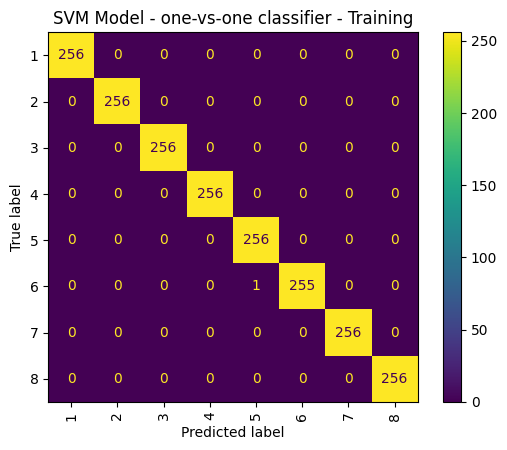

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
# Create the One-vs-One classifier
ovo_svm = OneVsOneClassifier(base_svm)

# Train the model
ovo_svm.fit(data_train_reduced, data_trainlbs_final)

# Predict on the test set
ovo_predictions = ovo_svm.predict(data_train_reduced)

# Evaluate the model
ovo_accuracy = accuracy_score(data_trainlbs_final, ovo_predictions)
print(f"One-vs-One Accuracy: {ovo_accuracy * 100:.2f}%")

# Print classification report
print("\nOne-vs-One Classification Report:")
print(classification_report(data_trainlbs_final, ovo_predictions))

# Compute confusion matrix
conf_matrix = confusion_matrix(data_trainlbs_final, ovo_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(data_trainlbs_final))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("SVM Model - one-vs-one classifier - Training")
plt.show()


Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.01, 'solver': 'adam'}
ANN Accuracy : 99.85%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       256
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       256
           4       1.00      1.00      1.00       256
           5       1.00      0.99      0.99       256
           6       0.99      1.00      0.99       256
           7       1.00      1.00      1.00       256
           8       1.00      1.00      1.00       256

    accuracy                           1.00      2048
   macro avg       1.00      1.00      1.00      2048
weighted avg       1.00      1.00      1.00      2048



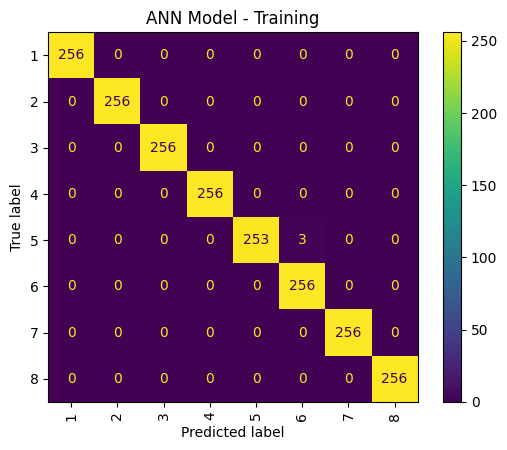

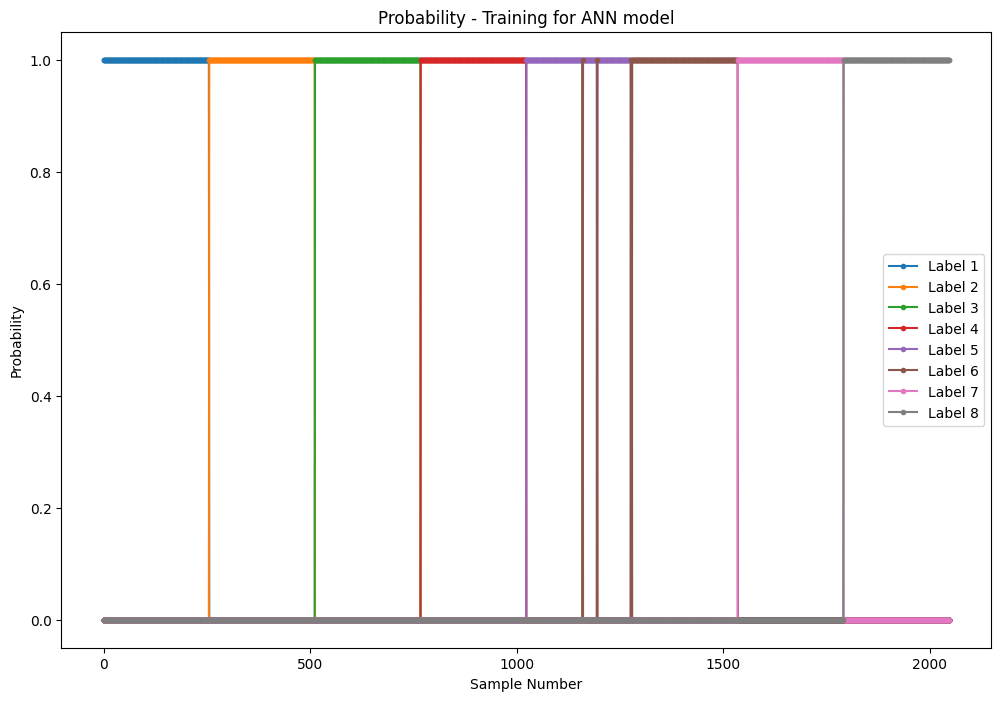

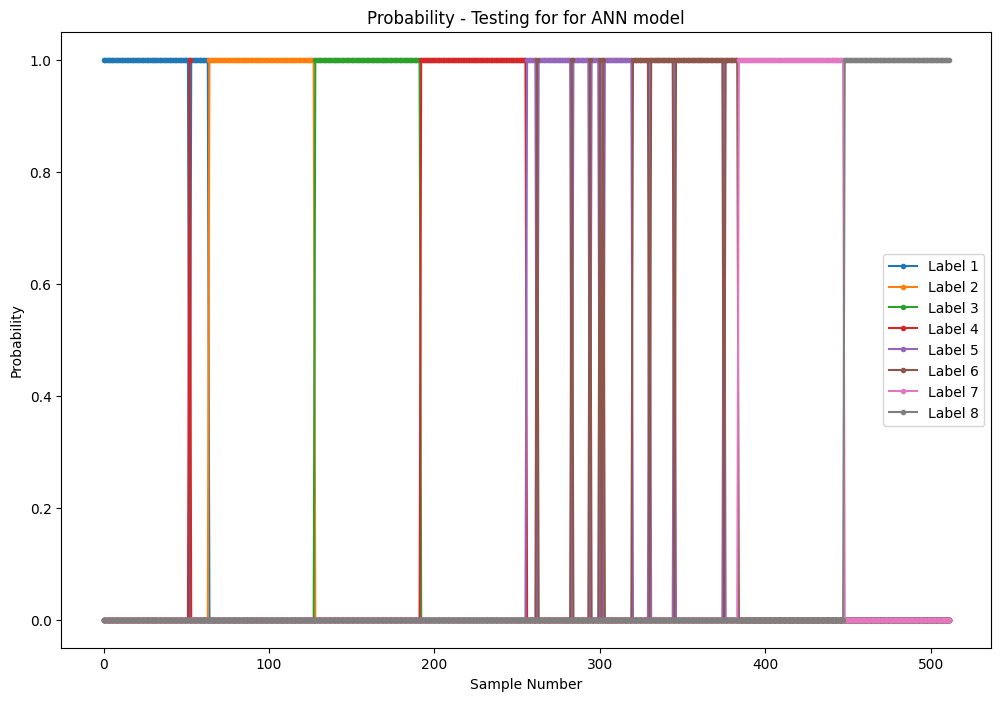

In [ ]:
# ANN MODEL
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {
     'hidden_layer_sizes': [(128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [ 0.01],
    'learning_rate_init': [ 0.01 ],
    'solver': ['adam']
}

grid_search = GridSearchCV(
    estimator=MLPClassifier(max_iter=500, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(data_train_reduced, data_trainlbs_final)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions
ann_predictions = best_model.predict(data_train_reduced)

# Evaluate the model
ann_accuracy = accuracy_score(data_trainlbs_final, ann_predictions)
print(f"ANN Accuracy : {ann_accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(data_trainlbs_final, ann_predictions))

# Compute confusion matrix
conf_matrix = confusion_matrix(data_trainlbs_final, ann_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(data_trainlbs_final))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("ANN Model - Training")
plt.show()

# Plot the probability
train_probability = best_model.predict_proba(data_train_reduced)
test_probability = best_model.predict_proba(data_test_reduced)

plt.figure(figsize=(12, 8))
plt.plot(train_probability, marker='.')
plt.title('Probability - Training for ANN model')
plt.legend(['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8'])
plt.xlabel('Sample Number')
plt.ylabel('Probability')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(test_probability, marker='.')
plt.title('Probability - Testing for for ANN model')
plt.legend(['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8'])
plt.xlabel('Sample Number')
plt.ylabel('Probability')
plt.show()

In [ ]:
# # Load the training data from the .mat file and print to check the structure
# training_data_mat = loadmat('data_train.mat')
# # Print the keys
# print(training_data_mat)
# # Write the training data into a csv file for better visualization and handling
# data_train = training_data_mat['data_train']
# data_train_flatten = []
# # Loop through each sub-array in data_train and flatten it
# for i, array in enumerate(data_train.flat):
#     if isinstance(array, np.ndarray):
#         flattened_row = array.flatten()
#         data_train_flatten.append(flattened_row)
# # Store the data in a DataFrame
# training_data_df = pd.DataFrame(data_train_flatten)
# training_data_df = training_data_df.T
# directory = '/content/drive/MyDrive/ENME691/final_project/Project 3/Dataset for Team'
# file_path = f'{directory}/train_data.csv'
# training_data_df.to_csv(file_path, index=False)
# Check for the shape of the training data

# # Load the testing data from the .mat file and print to check the structure
# testing_data_mat = loadmat('data_test.mat')
# # Print the keys
# # print(testing_data_mat)
# # Write the testing data into a csv file for better visualization and handling
# data_test = testing_data_mat['data_test']
# data_test_flatten = []
# # Loop through each sub-array in data_test and flatten it
# for i, array in enumerate(data_test.flat):
#     if isinstance(array, np.ndarray):
#         flattened_row = array.flatten()
#         data_test_flatten.append(flattened_row)
# # Store the data in a DataFrame
# testing_data_df = pd.DataFrame(data_test_flatten)
# testing_data_df = testing_data_df.T
# directory = '/content/drive/MyDrive/ENME691/final_project/Project 3/Dataset for Team'
# file_path = f'{directory}/test_data.csv'
# testing_data_df.to_csv(file_path, index=False)
# Check for the shape of the testing data
# file_path = '/content/drive/MyDrive/ENME691/final_project/Project 3/Dataset for Team/test_data_modified.csv'
# data_test_csv = pd.read_csv(file_path)
# num_rows, num_columns = data_test_csv.shape
# print("Number of rows",num_rows)
# print("Number of columns",num_columns)
# Store the testing data in a numpy array
# data_test_mod = data_test_csv.to_numpy()
# print(data_test_mod.shape)

# data_test_1 = np.random.rand(8192, 1)
# data_test_2 = np.random.rand(8192, 1)
# data_test_3 = np.random.rand(8192, 1)
# data_test_4 = np.random.rand(8192, 1)
# data_test_5 = np.random.rand(8192, 1)
# data_test_6 = np.random.rand(8192, 1)
# data_test_7 = np.random.rand(8192, 1)
# data_test_8 = np.random.rand(8192, 1)
# for i in range(512):  # Loop through all columns
#     if data_test_mod[0, i] == 1:
#         data_test_1 = np.concatenate((data_test_1, data_test_mod[1:, i].reshape(-1, 1)), axis=1)
#     elif data_test_mod[0, i] == 2:
#         data_test_2 = np.concatenate((data_test_2, data_test_mod[1:, i].reshape(-1, 1)), axis=1)
#     elif data_test_mod[0, i] == 3:
#         data_test_3 = np.concatenate((data_test_3, data_test_mod[1:, i].reshape(-1, 1)), axis=1)
#     elif data_test_mod[0, i] == 4:
#         data_test_4 = np.concatenate((data_test_4, data_test_mod[1:, i].reshape(-1, 1)), axis=1)
#     elif data_test_mod[0, i] == 5:
#         data_test_5 = np.concatenate((data_test_5, data_test_mod[1:, i].reshape(-1, 1)), axis=1)
#     elif data_test_mod[0, i] == 6:
#         data_test_6 = np.concatenate((data_test_6, data_test_mod[1:, i].reshape(-1, 1)), axis=1)
#     elif data_test_mod[0, i] == 7:
#         data_test_7 = np.concatenate((data_test_7, data_test_mod[1:, i].reshape(-1, 1)), axis=1)
#     elif data_test_mod[0, i] == 8:
#         data_test_8 = np.concatenate((data_test_8, data_test_mod[1:, i].reshape(-1, 1)), axis=1)

# # Final concatenation
# data_test_final = np.concatenate((data_test_1[:, 1:], data_test_2[:, 1:], data_test_3[:, 1:],data_test_4[:, 1:], data_test_5[:, 1:], data_test_6[:, 1:],data_test_7[:, 1:], data_test_8[:, 1:]),axis=1)

# print(data_test_final[:,64])

# output_file = "data_test_final.csv"
# np.savetxt(output_file, data_test_final, delimiter=",", fmt="%.6f")


# # Load the training data labels from the .mat file and print to check the structure
# training_datalbs_mat = loadmat('data_train_labels.mat')
# # Print the keys
# print(training_datalbs_mat)
# # Write the training data labels into a csv file for better visualization and handling
# data_train_labels = training_datalbs_mat['data_train_labels']
# # Store the data in a DataFrame
# training_datalbs_df = pd.DataFrame(data_train_labels)
# directory = '/content/drive/MyDrive/ENME691/final_project/Project 3/Dataset for Team'
# file_path = f'{directory}/train_data_labels.csv'
# training_datalbs_df.to_csv(file_path, index=False)
# Check for the shape of the training data labels

# # Load the testing data labels from the .mat file and print to check the structure
# testing_datalbs_mat = loadmat('data_test_labels.mat')

# # Write the testing data labels into a csv file for better visualization and handling
# data_test_labels = testing_datalbs_mat['data_test_labels']
# # Store the data in a DataFrame
# testing_datalbs_df = pd.DataFrame(data_test_labels)
# directory = '/content/drive/MyDrive/ENME691/final_project/Project 3/Dataset for Team'
# file_path = f'{directory}/test_data_labels.csv'
# testing_datalbs_df.to_csv(file_path, index=False)
# Check for the shape of the training data labels


# import math
# D = 60 # mm
# d = 10 # mm
# n= 17
# angle = 14.94 * math.pi
# f_i = 800 / 60 # Hz

# BPFO_freq = n * f_i / 2 * (1- (d/D *math.cos(angle)))
# BPFI_freq = n * f_i / 2 * (1+ (d/D *math.cos(angle)))
# BFF_freq = f_i * (D / d) * (1 - (d / D * math.cos(angle))**2)
# FTF_freq =  f_i / 2 * (1- (d/D *math.cos(angle)))
# print("BPFO:", BPFO_freq)
# print("BPFI:", BPFI_freq)
# print("BFF:", BFF_freq)
# print("FTF:", FTF_freq)

# # Ball Pass Frequency Inner (BPFI) of 95  Hz
# # Calculate the index corresponding to the frequency closest to 95 Hz
# BPFI_index = np.argmin(np.abs(frequency_axis - BPFI_freq))
# # Extract the magnitude at the BPFI for training and test data
# BPFI_train_magnitude = np.abs(data_train_frequency[BPFI_index, :])
# BPFI_test_magnitude = np.abs(data_test_frequency[BPFI_index, :])
# # Print or use the BPFI magnitudes for classification
# print("BPFI magnitude in training data:", BPFI_train_magnitude)
# print("Shape of BPFI",  BPFI_train_magnitude.shape)
# plt.figure(figsize=(10, 6))
# labels = ['Healthy', 'Roller fault', 'Inner race fault', 'Outer race fault', 'Inner race & Roller fault', 'Inner race & Outer race fault', 'Outer & Inner race & Roller fault', 'Outer race & Roller fault']
# colors = ['green', 'orange', 'red', 'pink', 'brown', 'yellow', 'black', 'violet']
# for i in range(0,8,1):
#   plt.plot(np.arange(255), BPFI_train_magnitude[i*256:256*(i+1)-1], label=labels[i], color=colors[i])
# plt.title("Feature Visualization - BPFI Magnitude")
# plt.xlabel("Samples")
# plt.ylabel("Magnitude at 99 Hz (BPFI)")
# plt.legend()
# plt.show()

# #  Ball pass frequency of the outer race (BPFO) of 131 Hz
# # Calculate the index corresponding to the frequency closest to 131 Hz
# BPFO_index = np.argmin(np.abs(frequency_axis - BPFO_freq))

# # Extract the magnitude at the BPFO for training and test data
# BPFO_train_magnitude = np.abs(data_train_frequency[BPFO_index, :])
# BPFO_test_magnitude = np.abs(data_test_frequency[BPFO_index, :])

# # Print or use the BPFO magnitudes for classification
# print("BPFO magnitude in training data:", BPFO_train_magnitude)
# print("Shape of BPFO", BPFO_train_magnitude.shape)


# plt.figure(figsize=(10, 6))
# labels = ['Healthy', 'Roller fault', 'Inner race fault', 'Outer race fault', 'Inner race & Roller fault', 'Inner race & Outer race fault', 'Outer & Inner race & Roller fault', 'Outer race & Roller fault']
# colors = ['green', 'orange', 'red', 'pink', 'brown', 'yellow', 'black', 'violet']
# for i in range(0,8,1):
#   plt.plot(np.arange(255), BPFO_train_magnitude[i*256:256*(i+1)-1], label=labels[i], color=colors[i])
# plt.title("Feature Visualization - BPFO Magnitude")
# plt.xlabel("Samples")
# plt.ylabel("Magnitude at 131 Hz (BPFO)")
# plt.legend()
# plt.show()

# #  Fundamental train frequency (FTF) of 7.7 Hz
# # Calculate the index corresponding to the frequency closest to 7.7 Hz
# FTF_index = np.argmin(np.abs(frequency_axis - FTF_freq))

# # Extract the magnitude at the FTF for training and test data
# FTF_train_magnitude = np.abs(data_train_frequency[FTF_index, :])
# FTF_test_magnitude = np.abs(data_test_frequency[FTF_index, :])

# # Print or use the FTF magnitudes for classification
# print("FTF magnitude in training data:", FTF_train_magnitude)
# print("Shape of FTF", FTF_train_magnitude.shape)

# plt.figure(figsize=(10, 6))
# labels = ['Healthy', 'Roller fault', 'Inner race fault', 'Outer race fault', 'Inner race & Roller fault', 'Inner race & Outer race fault', 'Outer & Inner race & Roller fault', 'Outer race & Roller fault']
# colors = ['green', 'orange', 'red', 'pink', 'brown', 'yellow', 'black', 'violet']
# for i in range(0,8,1):
#   plt.plot(np.arange(255), FTF_train_magnitude[i*256:256*(i+1)-1], label=labels[i], color=colors[i])
# plt.title("Feature Visualization - FTF Magnitude")
# plt.xlabel("Samples")
# plt.ylabel("Magnitude at 7.7 Hz (FTF)")
# plt.legend()
# plt.show()

# #  Ball Fault Frequency (BFF)  of 77 Hz
# # Calculate the index corresponding to the frequency closest to 77 Hz
# BFF_index = np.argmin(np.abs(frequency_axis - BFF_freq))

# # Extract the magnitude at the BFF for training and test data
# BFF_train_magnitude = np.abs(data_train_frequency[BFF_index, :])
# BFF_test_magnitude = np.abs(data_test_frequency[BFF_index, :])

# # Print or use the BFF magnitudes for classification
# print("BFF magnitude in training data:", BFF_train_magnitude)
# print("Shape of BFF", BFF_train_magnitude.shape)

# plt.figure(figsize=(10, 6))
# labels = ['Healthy', 'Roller fault', 'Inner race fault', 'Outer race fault', 'Inner race & Roller fault', 'Inner race & Outer race fault', 'Outer & Inner race & Roller fault', 'Outer race & Roller fault']
# colors = ['green', 'orange', 'red', 'pink', 'brown', 'yellow', 'black', 'violet']
# for i in range(0,8,1):
#   plt.plot(np.arange(255), BFF_train_magnitude[i*256:256*(i+1)-1], label=labels[i], color=colors[i])
# plt.title("Feature Visualization - BFF Magnitude")
# plt.xlabel("Samples")
# plt.ylabel("Magnitude at 77 Hz (BFF)")
# plt.legend()
# plt.show()


# from sklearn import svm
# from sklearn.metrics import confusion_matrix

# AllAtOnceSVM =svm.SVC()
# data_trainlbs_final = data_trainlbs_final.reshape(-1)
# # data_testlbs_final = data_testlbs_final.reshape(-1)
# data_testlbs_final = np.concatenate((np.ones(shape=(1,64)),2*np.ones(shape=(1,64)),3*np.ones(shape=(1,64)),4*np.ones(shape=(1,64)),5*np.ones(shape=(1,64)),6*np.ones(shape=(1,64)),7*np.ones(shape=(1,64)),8*np.ones(shape=(1,64))), axis=1).reshape(-1)

# AllAtOnceSVM.fit(data_train_reduced, data_trainlbs_final)
# # confMTrain = confusion_matrix(data_trainlbs_final, AllAtOnceSVM.predict(data_train_reduced))
# # print(confMTrain)
# # confMTest = confusion_matrix(data_testlbs_final, AllAtOnceSVM.predict(data_test_reduced))
# # print(confMTest)
# print(AllAtOnceSVM.predict(data_train_reduced))
# print(AllAtOnceSVM.predict(data_test_reduced))
# print(AllAtOnceSVM.score(data_train_reduced, data_trainlbs_final))
# print(AllAtOnceSVM.score(data_test_reduced, data_testlbs_final))